In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("diamonds.csv")
print(df.shape)
print(df.info())

(53940, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [4]:
# we see that there are 11 columns and 53940 rows. And there are no null fields
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [5]:
# Unnamed column can be removed as it has no effect on price
df = df.drop([df.columns[0]], axis = 1)

In [6]:
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [7]:
# check the statistics
print(df.describe())


              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [8]:
# convert categorical to binary vectors
df1 = pd.get_dummies(df,prefix_sep='_', drop_first=True)
df1.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [9]:
# Pairwise correlation matrix
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1,0.028,0.18,0.92,0.98,0.95,0.95,0.034,-0.16,0.12,0.0096,-0.14,-0.06,-0.029,0.1,0.16,0.18,-0.11,0.063,0.27,-0.063,-0.039,-0.17,-0.14
depth,0.028,1,-0.3,-0.011,-0.025,-0.029,0.095,0.14,-0.023,-0.2,0.026,-0.029,-0.018,0.0028,0.026,0.023,0.023,-0.031,0.041,0.0072,-0.024,-0.0095,-0.023,-0.019
table,0.18,-0.3,1,0.13,0.2,0.18,0.15,0.18,-0.55,0.34,0.12,0.0072,-0.0049,-0.039,0.012,0.018,0.037,-0.079,0.052,0.095,-0.027,-0.0097,-0.069,-0.062
price,0.92,-0.011,0.13,1,0.88,0.87,0.86,-0.00031,-0.097,0.096,0.0066,-0.1,-0.024,0.0086,0.059,0.097,0.082,-0.05,0.009,0.13,-0.0099,-0.0011,-0.095,-0.052
x,0.98,-0.025,0.2,0.88,1,0.97,0.97,0.03,-0.16,0.13,0.0046,-0.13,-0.048,-0.025,0.096,0.15,0.16,-0.13,0.079,0.27,-0.06,-0.036,-0.19,-0.15
y,0.95,-0.029,0.18,0.87,0.97,1,0.95,0.032,-0.15,0.11,0.017,-0.13,-0.047,-0.024,0.093,0.14,0.16,-0.12,0.076,0.26,-0.056,-0.036,-0.18,-0.14
z,0.95,0.095,0.15,0.86,0.97,0.95,1,0.045,-0.16,0.09,0.016,-0.13,-0.049,-0.025,0.095,0.15,0.16,-0.13,0.081,0.26,-0.059,-0.036,-0.18,-0.14
cut_Good,0.034,0.14,0.18,-0.00031,0.03,0.032,0.045,1,-0.26,-0.19,-0.17,0.007,0.0069,-0.025,-0.0095,0.0062,0.015,-0.033,0.056,0.042,-0.017,-0.021,-0.038,-0.039
cut_Ideal,-0.16,-0.023,-0.55,-0.097,-0.16,-0.15,-0.16,-0.26,1,-0.48,-0.44,-0.0011,0.0014,0.035,-0.021,-0.0092,-0.038,0.1,-0.083,-0.11,0.034,0.016,0.088,0.076
cut_Premium,0.12,-0.2,0.34,0.096,0.13,0.11,0.09,-0.19,-0.48,1,-0.31,-0.018,-0.012,0.0039,0.028,0.0059,0.017,-0.054,0.023,0.068,-0.012,0.023,-0.054,-0.062


In [10]:
# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF = add_constant(df1)
pd.Series([variance_inflation_factor(VIF.values, i) 
               for i in range(VIF.shape[1])], 
              index=VIF.columns)


C:\Users\Prabhjyot\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const            7041.268085
carat              44.743271
depth               1.788946
table               1.790506
price              12.467506
x                  58.520407
y                  20.592254
z                  23.586562
cut_Good            3.962344
cut_Ideal          11.439056
cut_Premium         8.434645
cut_Very Good       7.702974
color_E             2.015046
color_F             2.021610
color_G             2.224280
color_H             2.049797
color_I             1.862482
color_J             1.640197
clarity_IF          4.245964
clarity_SI1        16.691529
clarity_SI2        12.275574
clarity_VS1        12.883324
clarity_VS2        16.768777
clarity_VVS1        7.174677
clarity_VVS2        9.191331
dtype: float64

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df1.drop('price', axis=1)
print(X.head())

Price = df1['price']
#Features_train, Features_test, Price_train, Price_test = train_test_split(Features, Price, test_size=0.30, random_state=42)
X_train, X_test, Price_train, Price_test = train_test_split(X, Price, test_size=0.3, random_state=42)

   carat  depth  table     x     y     z  cut_Good  cut_Ideal  cut_Premium  \
0   0.23   61.5   55.0  3.95  3.98  2.43         0          1            0   
1   0.21   59.8   61.0  3.89  3.84  2.31         0          0            1   
2   0.23   56.9   65.0  4.05  4.07  2.31         1          0            0   
3   0.29   62.4   58.0  4.20  4.23  2.63         0          0            1   
4   0.31   63.3   58.0  4.34  4.35  2.75         1          0            0   

   cut_Very Good  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0              0  ...        0        0        0           0            0   
1              0  ...        0        0        0           0            1   
2              0  ...        0        0        0           0            0   
3              0  ...        0        1        0           0            0   
4              0  ...        0        0        1           0            0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2

In [12]:
print("X", X.shape)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X (53940, 23)
X_train: (37758, 23)
X_test: (16182, 23)


In [13]:
from sklearn.linear_model import LinearRegression

print("\nLINEAR (subset)")
rgr = LinearRegression(normalize=True)
rgr.fit(X_train, Price_train)
print("model:", rgr)
print("coeffs:", rgr.coef_)
print("intercept:", rgr.intercept_)

#Evaluate the predictions of the model
Price_predictions_regression = rgr.predict(X_test)
print('R squared:', rgr.score(X_test, Price_test))
print(Price_predictions_regression[:10])
print(Price_test[:10])

Price_predictions_regression


LINEAR (subset)
model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
coeffs: [ 1.12262051e+04 -6.31199113e+01 -2.70960563e+01 -9.80549238e+02
 -5.63315299e+00 -4.81547644e+01  5.95521080e+02  8.46196258e+02
  7.77769963e+02  7.43301360e+02 -2.17028968e+02 -2.73303976e+02
 -5.00160238e+02 -9.98634669e+02 -1.47608423e+03 -2.38198979e+03
  5.45903730e+03  3.75170967e+03  2.78194055e+03  4.65783431e+03
  4.33672558e+03  5.10133518e+03  5.02829553e+03]
intercept: 2041.2862777695127
R squared: 0.9201866914388087
[ 711.56570501 3197.40419579 1943.02948182 2080.07561855 9871.56234383
 3941.19403297 2380.50740952 2377.76870584 2849.51603502 6193.3930034 ]
1388      559
50052    2201
41645    1238
42377    1304
17244    6901
1608     3011
46398    1765
45493    1679
49385    2102
10460    4789
Name: price, dtype: int64


array([  711.56570501,  3197.40419579,  1943.02948182, ...,
       10609.79287119,  4105.70876126,  1993.88821027])

In [14]:
print("\n\nRIDGE")
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(X_train, Price_train)
print("model:", ridge)
print("ridge coeffs:", ridge.coef_)
print("ridge intercept:", ridge.intercept_)
Price_predictions = ridge.predict(X_test)
print('Ridge R squared:', ridge.score(X_test, Price_test))
print(Price_predictions_regression[:10])
print(Price_test[:10])




RIDGE
model: Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
ridge coeffs: [10925.01587025   -58.67205704   -27.50310767  -842.73547965
   -13.04881922   -63.35273217   601.93412349   853.16704164
   784.74428209   753.85685954  -212.91240653  -271.48357188
  -494.84615558  -988.31164435 -1459.3484484  -2360.07084704
  5206.10929563  3492.69770647  2530.77500572  4398.63761075
  4079.34339431  4848.86703898  4773.28304285]
ridge intercept: 1575.570321124951
Ridge R squared: 0.9201516109045541
[ 711.56570501 3197.40419579 1943.02948182 2080.07561855 9871.56234383
 3941.19403297 2380.50740952 2377.76870584 2849.51603502 6193.3930034 ]
1388      559
50052    2201
41645    1238
42377    1304
17244    6901
1608     3011
46398    1765
45493    1679
49385    2102
10460    4789
Name: price, dtype: int64


In [15]:
print("\n\nLASSO")
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, Price_train)
print(lasso)
print("Lasso coeffs:", lasso.coef_)
print("Lasso intercept:", lasso.intercept_)
Price_predictions = lasso.predict(X_test)
print('Lasso R squared:', lasso.score(X_test, Price_test))
print(Price_predictions[:10])
print(Price_test[:10])



LASSO
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso coeffs: [ 1.12054137e+04 -6.31945402e+01 -2.71945999e+01 -9.73354356e+02
 -4.84891691e+00 -4.81018146e+01  5.87134344e+02  8.38033348e+02
  7.69487930e+02  7.35386573e+02 -2.13424410e+02 -2.69895193e+02
 -4.96365771e+02 -9.94551736e+02 -1.47129449e+03 -2.37672464e+03
  5.42432547e+03  3.71786070e+03  2.74850473e+03  4.62355332e+03
  4.30290235e+03  5.06714407e+03  4.99419210e+03]
Lasso intercept: 2060.1629952834373
Lasso R squared: 0.9202031777918325
[ 708.57144154 3199.08106334 1942.99461149 2080.46821786 9869.70272604
 3952.26789092 2381.56776057 2375.14000271 2851.39420235 6194.96431693]
1388      559
50052    2201
41645    1238
42377    1304
17244    6901
1608     3011
46398    1765
45493    1679
49385    2102
10460    4789
Name: price, dtype: int64


In [16]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from math import sqrt

pipelines = {
    "rf": make_pipeline(StandardScaler(), ensemble.RandomForestRegressor(random_state=123)),
    "gb": make_pipeline(StandardScaler(), ensemble.GradientBoostingRegressor(random_state=123))
}

rf_hyperparameters = {
    "randomforestregressor__n_estimators": [100, 200],
    "randomforestregressor__max_features": ["auto", "sqrt", 0.33]
}
gb_hyperparameters = {
    "gradientboostingregressor__n_estimators": [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}
hyperparameters = {"rf": rf_hyperparameters,
                   "gb": gb_hyperparameters}


In [17]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1, verbose= 10)
    model.fit(X_train, Price_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.4min finished


rf has been fitted.
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 10

gb has been fitted.


In [18]:
for name, model in fitted_models.items():
    print(name)
    print("-----------")
    pred = model.predict(X_test)
    #print('MAE:', mean_absolute_error(Price_test, pred))
    print("MSE:", "\n", mean_squared_error(Price_test, pred))
    error = sqrt(mean_squared_error(Price_test,pred)) #calculate rmse
    
    print('RMSE value = ', error)

rf
-----------
MSE: 
 379167.43651329185
RMSE value =  615.7657318439309
gb
-----------
MSE: 
 338097.13077023
RMSE value =  581.4612031513625


In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#import required packages
from sklearn import neighbors
#from math import sqrt
%matplotlib inline



In [20]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Price_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Price_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 967.4833846403054
RMSE value for k=  2 is: 860.6834778273993
RMSE value for k=  3 is: 846.3822355099202
RMSE value for k=  4 is: 847.6344673446553
RMSE value for k=  5 is: 846.632161112711
RMSE value for k=  6 is: 850.1775496716044
RMSE value for k=  7 is: 860.6463743296537
RMSE value for k=  8 is: 875.8968123388462
RMSE value for k=  9 is: 890.0828203180326
RMSE value for k=  10 is: 902.7656668143273
RMSE value for k=  11 is: 914.0964433788535
RMSE value for k=  12 is: 923.9341504099907
RMSE value for k=  13 is: 934.4202795278562
RMSE value for k=  14 is: 949.3242545031446
RMSE value for k=  15 is: 960.477201586716
RMSE value for k=  16 is: 970.9462761146195
RMSE value for k=  17 is: 981.9472343335013
RMSE value for k=  18 is: 992.3389639103384
RMSE value for k=  19 is: 1000.9380403661606
RMSE value for k=  20 is: 1010.9743845022795


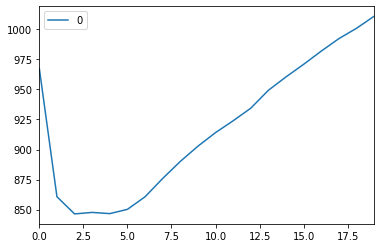

In [21]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()